In [1]:
import pandas as pd

### Removing Unecessary Column

In [2]:
df = pd.read_csv('csv_files/k/k.csv')

### Restructing into New CSV File

In [3]:
min_age = df['Age'].min()
min_age

22

In [4]:
max_age = df['Age'].max()
max_age

38

In [5]:
players = df['Player'].unique()
ages = list(range(22, 39))
new_df = pd.DataFrame(columns=['Player'] + list(ages))
new_df['Player'] = players
new_df.set_index('Player', inplace=True)

for player in players:
    player_data = df[df['Player'] == player]
    for _, row in player_data.iterrows():
        age = row['Age']
        av = row['AV']
        new_df.at[player, age] = av

new_df = new_df.fillna('N/A')

print(new_df)

                     22   23   24   25   26   27   28   29   30   31   32  \
Player                                                                      
Matthew Bosher      N/A  N/A    1    2    2    3    2    2    2    2  N/A   
Josh Brown          N/A  N/A    3    5    3    3    4    4    4    3    2   
David Buehler       N/A    2  N/A  N/A  N/A  N/A  N/A  N/A  N/A  N/A  N/A   
Randy Bullock       N/A  N/A    1    3    1  N/A    3    3    4    2    3   
Mason Crosby        N/A    3    2    2    3    3  N/A    4    3    4    3   
Paul Ernster        N/A  N/A    2  N/A  N/A  N/A  N/A  N/A  N/A  N/A  N/A   
Stephen Gostkowski    2    3    4    4    1    3    3    5    5    6    3   
Alex Henery         N/A  N/A    4    3    2  N/A  N/A  N/A  N/A  N/A  N/A   
Nate Kaeding          3    4    4    4    2    4    3  N/A  N/A  N/A  N/A   
Pat McAfee            2    2    3    3    2    3    3    3  N/A  N/A  N/A   
Justin Medlock      N/A  N/A  N/A  N/A  N/A  N/A  N/A    1  N/A  N/A  N/A   

In [6]:
new_df.to_csv('csv_files/k/new_k.csv')
df = pd.read_csv('csv_files/k/new_k.csv')

### Only Including Players w/ 3 Consecutive Years of AVs

In [7]:
df.set_index('Player', inplace=True)
filtered_df = df.dropna(thresh=3)
filtered_df.reset_index(inplace=True)
filtered_df.to_csv('csv_files/k/filtered_k.csv', index=False)

df = pd.read_csv('csv_files/k/new_k.csv')

df.set_index('Player', inplace=True)

def has_consecutive_av(player_av):
    consecutive_count = 0
    for av in player_av:
        if not pd.isna(av):
            consecutive_count += 1
            if consecutive_count == 3:
                return True
        else:
            consecutive_count = 0
    return False

players_with_consecutive_av = df[df.apply(has_consecutive_av, axis=1)]
players_with_consecutive_av.reset_index(inplace=True)

players_with_consecutive_av.to_csv('csv_files/k/final_k.csv', index=False)

### Prime Age of K
- Finding the three year stretch where each player has the highest average AV.
- Finding the average age (the middle age) of that player during that three year stretch.
- That will be their "prime" playing age.

In [9]:
df = pd.read_csv('csv_files/k/final_k.csv')
df.set_index('Player', inplace=True)

def calculate_average_av(player_av):
    max_avg_av = 0
    prime_age = None
    for i in range(len(player_av) - 2):
        three_year_avg = sum(player_av[i:i+3]) / 3
        if three_year_avg > max_avg_av:
            max_avg_av = three_year_avg
            prime_age = i + 22  # Adding 22 to get the actual age

    return prime_age

prime_ages = []
for player in df.index:
    player_av = df.loc[player, '22':'38'].tolist()
    prime_age = calculate_average_av(player_av)
    prime_ages.append({'Player': player, 'Prime Age': prime_age})
    
prime_age_df = pd.DataFrame(prime_ages)
prime_age_df.to_csv('csv_files/c/prime_ages_k.csv', index=False)

prime_ages_df = pd.read_csv('csv_files/c/prime_ages_k.csv')
prime_ages_df = prime_ages_df.iloc[:-1]
prime_ages_df.to_csv('csv_files/c/prime_ages_k.csv', index=False)

average_prime_age = prime_ages_df['Prime Age'].mean()

In [10]:
average_prime_age

26.916666666666668

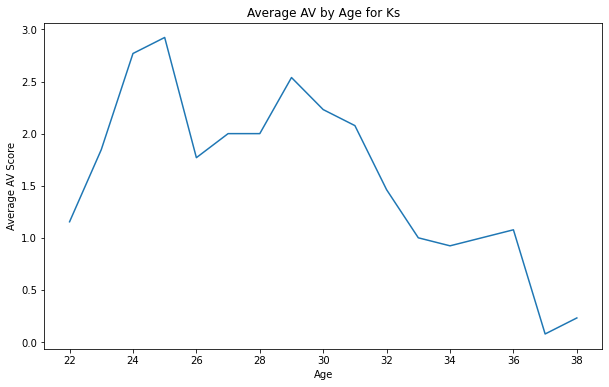

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('C:\\Users\\karth\\Documents\\vscode\\NFLPrimes\\csv_files\\k\\final_k.csv')

# Set 'Player' column as the index
df.set_index('Player', inplace=True)

# Initialize a dictionary to store the sum and count for each age
age_av = {}

# Iterate through the columns (ages)
for age in df.columns:
    # Filter out 0 values and calculate the average
    filtered_av = df[df[age] != 0][age]
    if not filtered_av.empty:
        age_av[age] = {'Sum': filtered_av.sum(), 'Count': len(filtered_av)}

# Calculate the average AV for each age
ages = []
average_avs = []
for age, data in age_av.items():
    average_av = data['Sum'] / data['Count']
    ages.append(int(age))  # Convert age to integer for plotting
    average_avs.append(average_av)

# Create a DataFrame for plotting
avg_av_df = pd.DataFrame({'Age': ages, 'Average AV': average_avs})

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Average AV', data=avg_av_df)
plt.title('Average AV by Age for Ks')
plt.xlabel('Age')
plt.ylabel('Average AV Score')
plt.show()